In [142]:
import numpy as np               
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [143]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [144]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [145]:
# Drop day , month , year
df = df.drop(['day' , 'month' , 'year'] , axis=1)

In [146]:
# Encoding 
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

In [147]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


fire = 1, 
not fire = 0 

In [148]:
df['Classes'].value_counts()

Classes
1    136
0    106
Name: count, dtype: int64

In [149]:
## Independent and Dependent Features 
X = df.drop('FWI' , axis  = 1)
y = df['FWI']

In [150]:
print(X)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
237           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
238           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
239           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
240           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
241           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[242 rows x 11 columns]


In [151]:
print(y)

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64


In [152]:
# Train Test split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state= 42)

In [153]:
X_train.shape

(181, 11)

In [154]:
y_test.shape

(61,)

In [155]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647087,-0.278207,-0.320465,0.695874,0.491115,0.377796,0.626962,0.464454,0.512498,0.250148
RH,-0.647087,1.000000,0.249640,0.236646,-0.642370,-0.415940,-0.235976,-0.707578,-0.362884,-0.447509,-0.385562
Ws,-0.278207,0.249640,1.000000,0.230003,-0.159851,0.004452,0.106745,-0.001751,0.041841,-0.040229,-0.231225
Rain,-0.320465,0.236646,0.230003,1.000000,-0.546555,-0.289354,-0.305889,-0.354579,-0.301253,-0.374078,-0.050991
FFMC,0.695874,-0.642370,-0.159851,-0.546555,1.000000,0.619719,0.530956,0.760210,0.607658,0.785278,0.235126
DMC,0.491115,-0.415940,0.004452,-0.289354,0.619719,1.000000,0.875318,0.689260,0.983603,0.606200,0.199351
DC,0.377796,-0.235976,0.106745,-0.305889,0.530956,0.875318,1.000000,0.537535,0.946111,0.538577,-0.082291
ISI,0.626962,-0.707578,-0.001751,-0.354579,0.760210,0.689260,0.537535,1.000000,0.652753,0.758900,0.287995
BUI,0.464454,-0.362884,0.041841,-0.301253,0.607658,0.983603,0.946111,0.652753,1.000000,0.601960,0.098420
Classes,0.512498,-0.447509,-0.040229,-0.374078,0.785278,0.606200,0.538577,0.758900,0.601960,1.000000,0.173264


In [156]:
def correlation(dataset , threshold) :
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [157]:
# threshold - Domain Expert 
corr_features = correlation(X_train , 0.85)

In [158]:
X_test.shape

(61, 11)

In [159]:
# drop features where corr is more than 0.85 
X_train.drop(corr_features , axis= 1 , inplace= True)
X_test.drop(corr_features , axis= 1 , inplace= True)

In [160]:
X_train.shape , X_test.shape

((181, 9), (61, 9))

In [161]:
# Feature Scaling  on Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [162]:
X_train_scaled

array([[-0.83729197,  0.77781425,  1.27806135, ..., -0.62636713,
        -1.08661074, -0.98356052],
       [-0.29604252,  0.64224913, -0.53202554, ..., -0.93328964,
        -1.08661074,  1.01671425],
       [-0.83729197, -1.45901026, -2.7041298 , ..., -0.48471059,
         0.92029277,  1.01671425],
       ...,
       [-1.91979088,  0.91337937,  0.55402659, ..., -1.07494618,
        -1.08661074, -0.98356052],
       [ 1.05708111, -0.44227185,  0.19200922, ...,  0.8138077 ,
         0.92029277,  1.01671425],
       [-0.56666725,  0.98116193,  2.0020961 , ..., -0.86246137,
        -1.08661074, -0.98356052]])

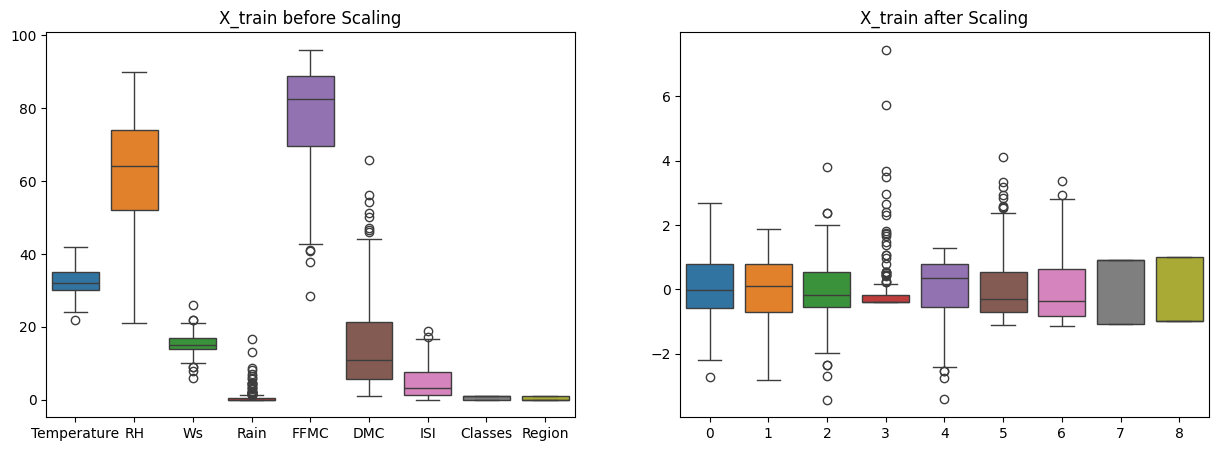

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 5))

# First subplot: Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')

# Second subplot: After scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling')

# Display the plot
plt.show()


# Linear Regression Model

Mean Absolute Error  0.6006890686060689
R2 Score  0.983401974374068


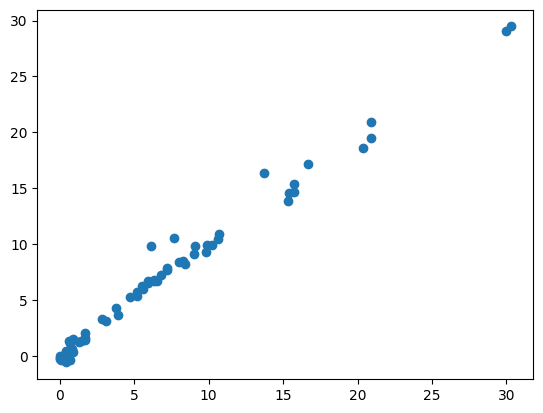

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled , y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error ", mae)
print("R2 Score " , score)
plt.scatter(y_test , y_pred)

## Apply the Lasso Regression 

Mean Absolute Error  1.1553215585753949
R2 Score  0.9503598184445512


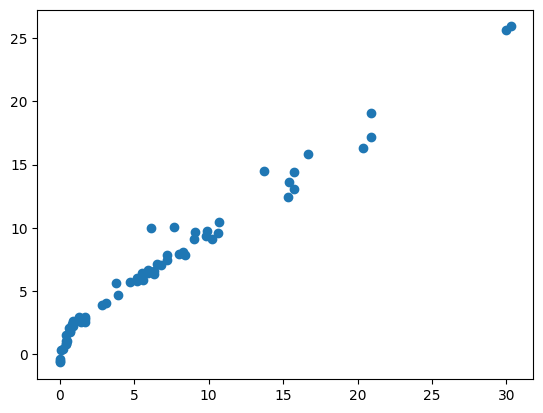

In [165]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled , y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error ", mae)
print("R2 Score " , score)
plt.scatter(y_test , y_pred)


## Ridge Regression 

Mean Absolute Error  0.626679345621442
R2 Score  0.9825846161440259


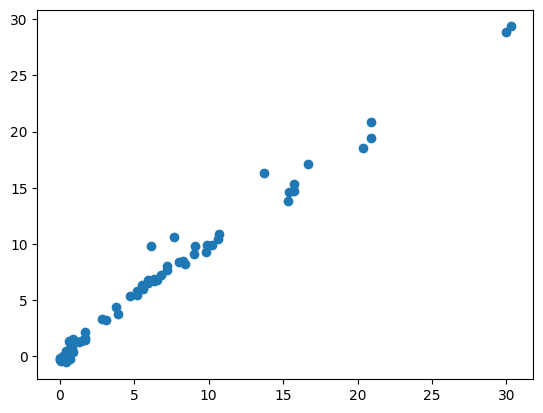

In [166]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled , y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error ", mae)
print("R2 Score " , score)
plt.scatter(y_test , y_pred)


## Elastic Net Regression

Mean Absolute Error  1.9573242969943947
R2 Score  0.8691090748881366


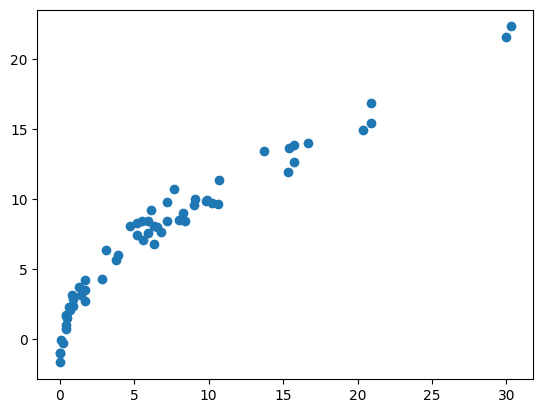

In [167]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model = ElasticNet()
model.fit(X_train_scaled , y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error ", mae)
print("R2 Score " , score)
plt.scatter(y_test , y_pred)


# Cross Validation with Lasso 

In [168]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_scaled , y_train)


LassoCV()

mean_absolute_error 0.691321749595599
r2_score 0.9806233371478975


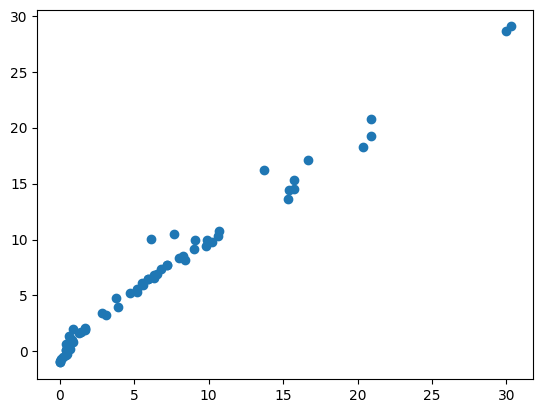

In [169]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)

mean_absolute_error 0.6266793456224017
r2_score 0.9825846161440277


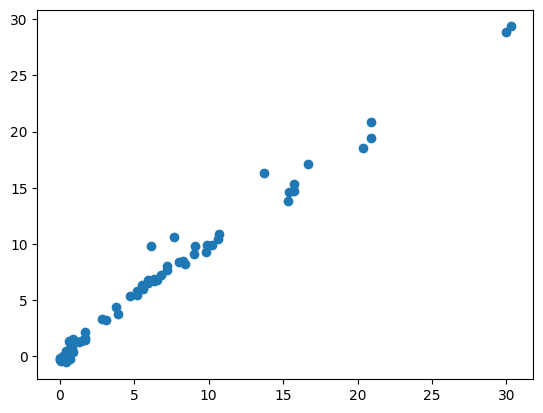

In [170]:
from sklearn.linear_model import RidgeCV
Ridgecv = RidgeCV()
Ridgecv.fit(X_train_scaled , y_train)
y_pred = Ridgecv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)

mean_absolute_error 0.6266793456224017
r2_score 0.9825846161440277


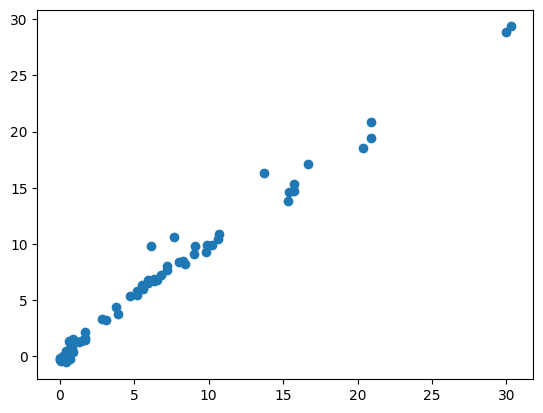

In [171]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV()
ElasticNetCV.fit(X_train_scaled , y_train)
y_pred = Ridgecv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)

In [172]:
# pickle the Machine learning Models , processing Models
import pickle
pickle.dump(scalar , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))